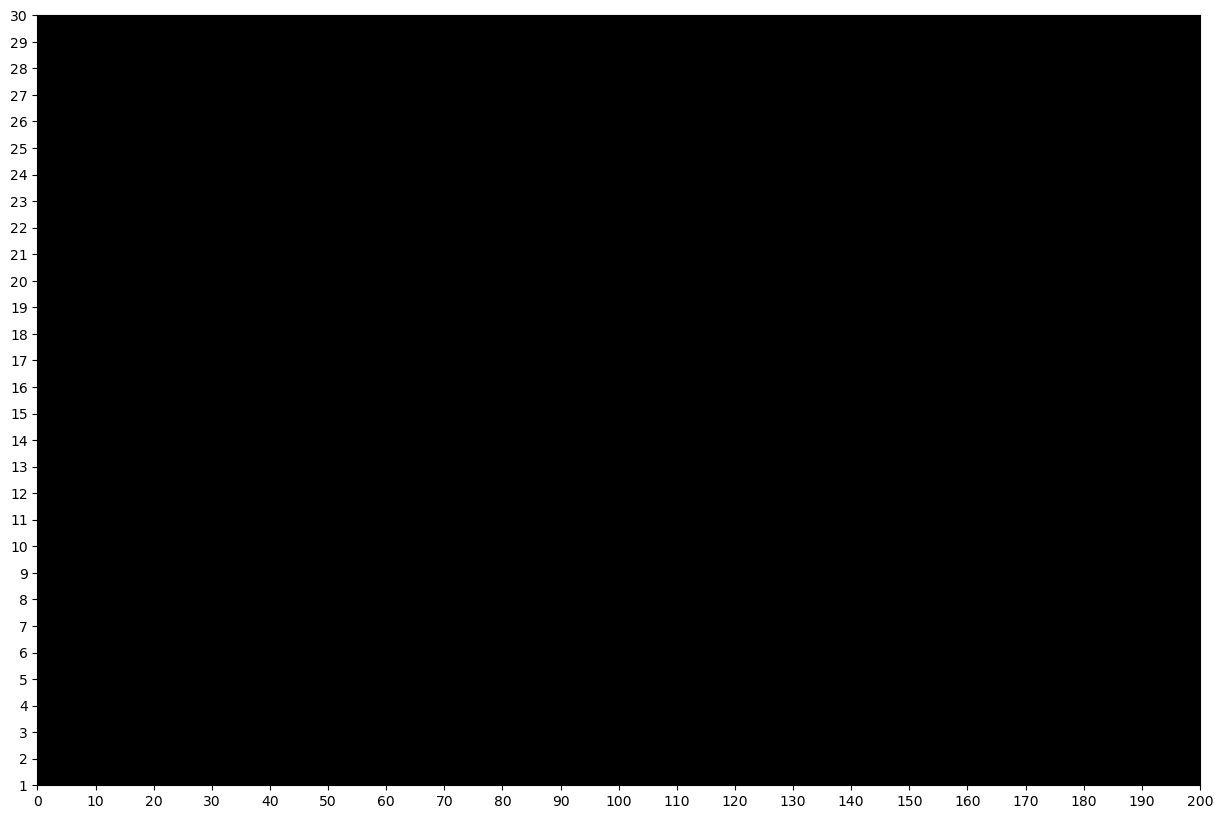

In [4]:
import pywt
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 1, 200)

# Finding signal by adding three different signals
signal = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7 * (t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
scales = np.arange(1, 31)  # No. of scales

coef, freqs = pywt.cwt(signal, scales, 'gaus1')  # Finding CWT using gaussian wavelet

# Plotting scalogram
plt.figure(figsize=(15, 10))
plt.imshow(abs(coef), extent=[0, 200, 30, 1], interpolation='bilinear', cmap='bone',
           aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, 31, 1))
plt.xticks(np.arange(0, 201, 10))
plt.show()

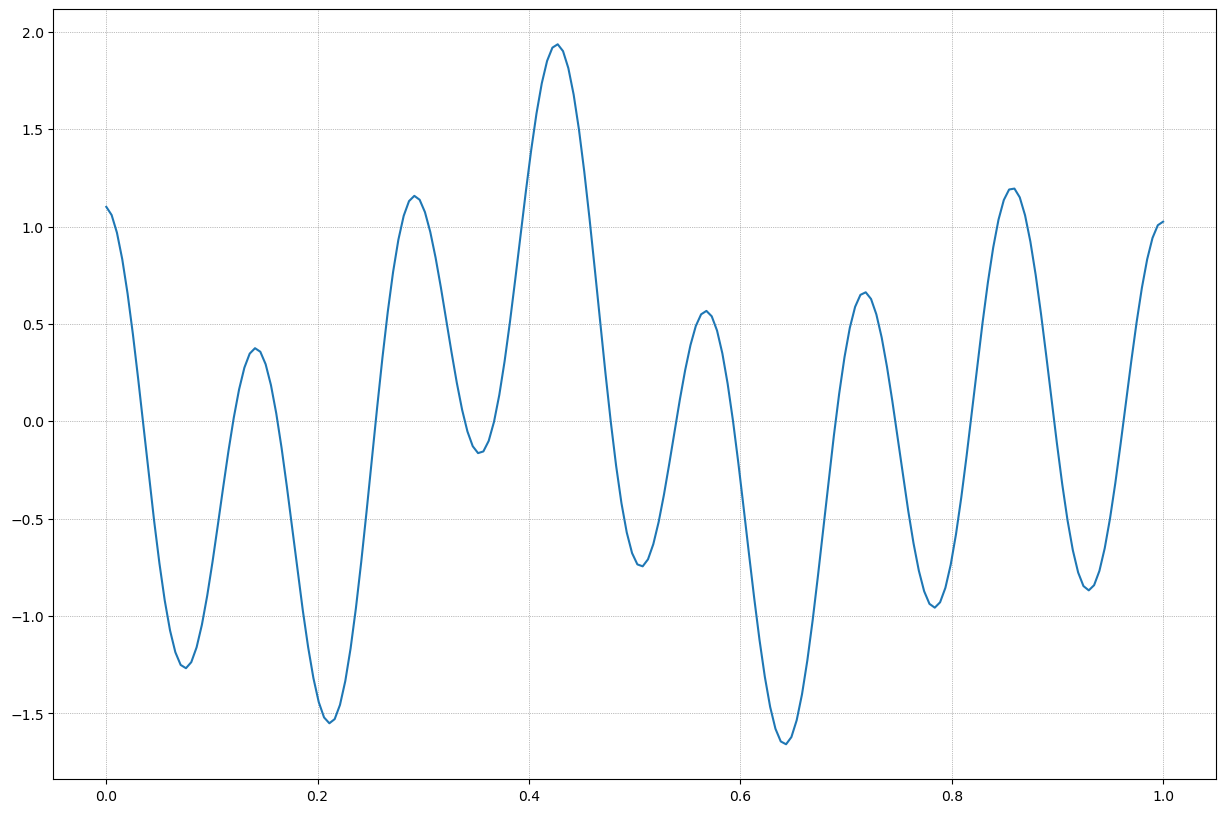

In [3]:
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(t, signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

In [95]:
from scipy.io import loadmat

data = loadmat('ceoae50g130rs20.mat')

signal = data['click50'].flatten()
fs = data['fs'][0]



In [97]:


#fs = 44100 # sampling frequency
#t = np.arange(0,0.1,1/fs)
t = np.arange(0,len(signal)/fs,1/fs)
# Finding signal by adding three different signals
#signal = np.cos(2 * np.pi * 1000 * t)# + np.real(np.exp(-7 * (t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))


dt = 1/fs
Nt = len(t)
fx = np.arange(Nt)*fs/Nt   # frequency axis
df = fx[1]-fx[0]

print(df)
print(Nt)
Nw = Nt//2  # number of wavelet filters

def mother_wavelet(Nw,Nt,df,dt):
    vlnky = np.zeros((Nt,Nw))
    tx = (np.arange(Nt)-Nw)*dt
    for k in range(Nw):
        vlnky[:,k] = np.exp(2*np.pi*1j*k*df*tx)*np.exp(-k*2*np.pi*df*tx**2)
    return vlnky

def mother_wavelet2(Nw,Nt,df,dt):
    vlnky = np.zeros((Nt,Nw))
    tx = (np.arange(Nt)-Nw)*dt
    for k in range(Nw):
        vlnky[:,k] = np.cos(2*np.pi*k*df*tx)*1/(1+(0.075*k*2*np.pi*df*tx)**4)
    return vlnky

vlnky = mother_wavelet2(Nw,Nt,df,dt)

#plt.plot(np.real(vlnky[:,1000]))




28.544243577545195
1051


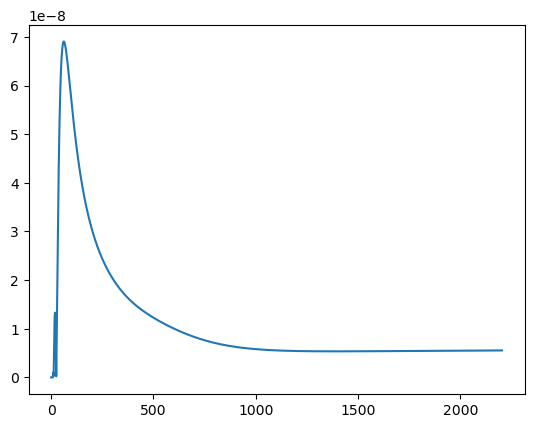

In [77]:
plt.plot(np.abs(coefwti[100,:]))


In [64]:
np.shape(svlnky)

np.shape(ssignal)

(4410,)

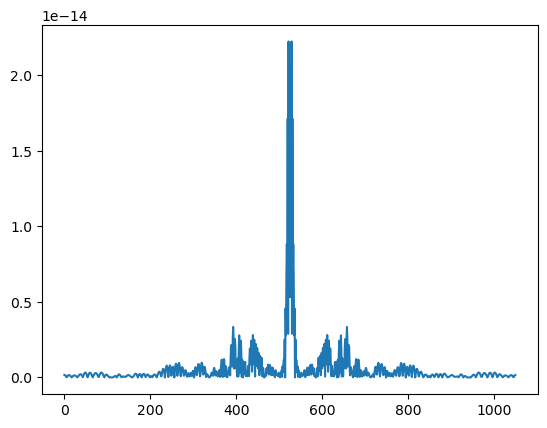

In [100]:
plt.plot(np.abs(coefwti[:,300]))

/tmp/ipykernel_6280/1145758364.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  svlnky[:,k] = np.fft.fft(vlnky[:,k])/Nt
/tmp/ipykernel_6280/1145758364.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  coefwt[:,k] = svlnky[:,k]*ssignal
/tmp/ipykernel_6280/1145758364.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  coefwti[:,k] = np.fft.ifft(coefwt[:,k])


(1051, 525)


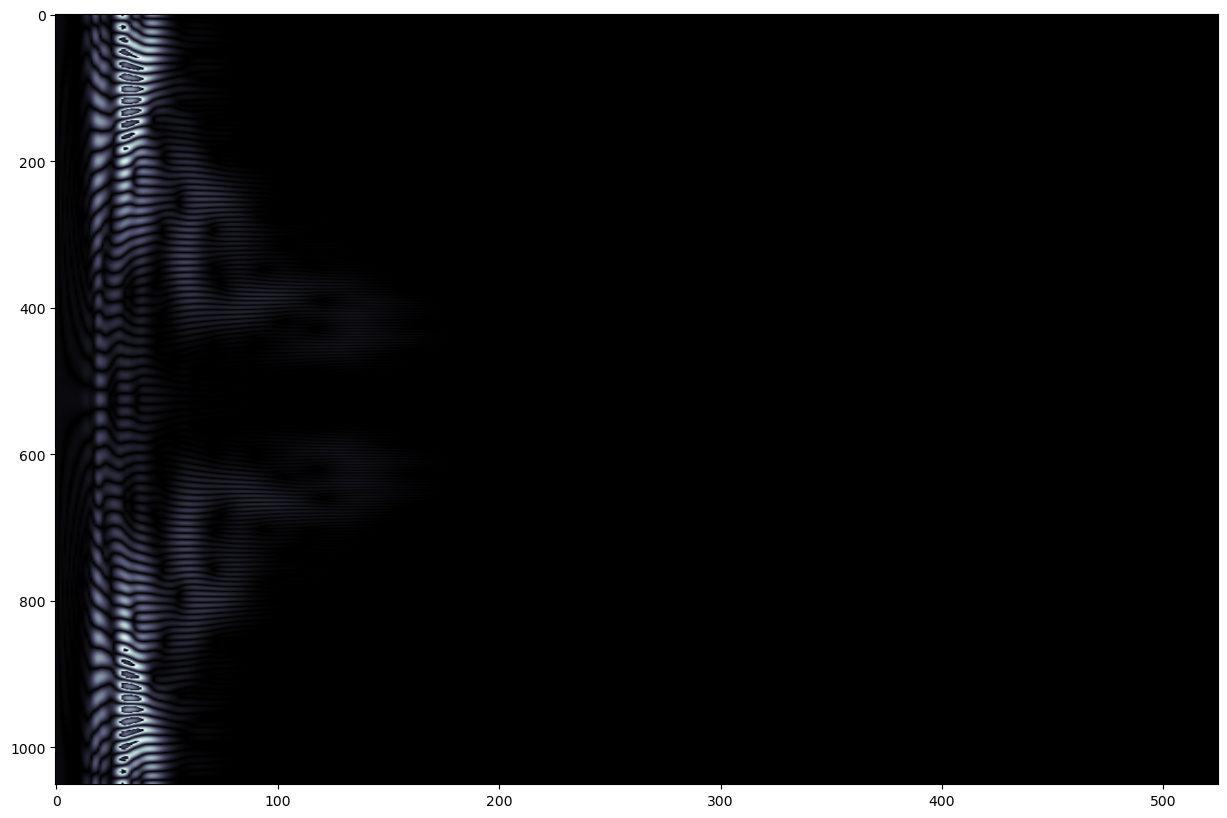

In [102]:
svlnky = np.zeros_like(vlnky)
for k in range(Nw):
    svlnky[:,k] = np.fft.fft(vlnky[:,k])/Nt

ssignal = np.fft.fft(signal)/Nt

coefwt = np.zeros_like(svlnky)
for k in range(Nw):
    coefwt[:,k] = svlnky[:,k]*ssignal
coefwti = np.zeros_like(coefwt)

for k in range(Nw):
    coefwti[:,k] = np.fft.ifft(coefwt[:,k])
    
plt.figure(figsize=(15, 10))
abscoef = 255*1e11*abs(coefwti)
img = abscoef.astype(np.uint8)
print(np.shape(img))


plt.imshow(img,interpolation='bilinear', cmap='bone',
           aspect='auto')
#plt.yticks(np.arange(1, 31, 1))
#plt.xticks(np.arange(0, 201, 10))
plt.show()

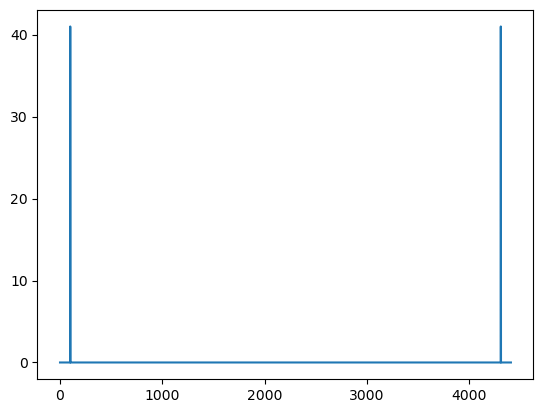

In [59]:
plt.plot(img[:,20])

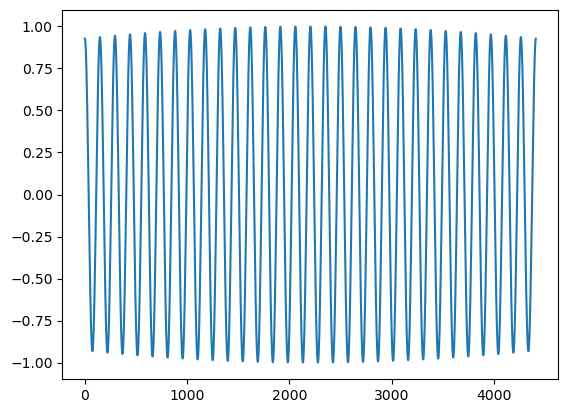

In [17]:
plt.plot(np.real(vlny[:,30]))
